# Part IV

# Clustering

### Fuzzy Clustering with Anomalous Patterns

1. Study the fuzzy c-means (FCM) program in the software package of your choice.Apply the program to your dataset at the same hyperparameter c with random seeds. Do this for several different values c= c_min, ..., c_max. Plot the FCM clustering criterion (FCM cost function) in function of c. Analyse the graphic and comment if any number of clusters better fits your data than the others. Hint: If, at a given c, the fuzzy c-means converges to the same result at any initialization, then it is likely that parameter c is correct.
2. Study the (Iterative) Anomalous Pattern (IAP) clustering algorithm. Test the implementation with the benchmark data sets provided to you.
3. Take the Anomalous Clustering as the initialization algorithm to the fuzzy c-means and apply the Anomalous Patterns_FCM to your data set. Discuss the option taken for setting its stop condition. Present and visualize the found fuzzy partitions of AP-FCM taking advantage of the PCA visualization (check PCA tutorial).
4. Discuss the results obtained by Anomalous Patterns FCM for your data case respecting the following: (i) location of the initial prototypes; (ii) number of clusters.
5. Apply, at least, two validation indices, like the Adjust Rand Index (ARI) and Xie-Beni, to access the quality of the fuzzy c-partitions obtained in a). Compare these results with the one of Anomalous Patterns FCM getting in c).
6. Make interpretation of the found clusters (after defuzzification) for your data, as discussed in the classes.

In [21]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

In [22]:
# Loading the dataset as a pandas df
data = pd.read_csv("../data/breast_cancer_mod.csv")
data.head()

,diagnosis_M,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [23]:
# Retrieving the data matrix (discrading the target attribute)
X = data.iloc[:, 1:].values
X.shape

(569, 30)

### Data normalization by Range

In [24]:
# Normalization by Range

def norm_by_range(X):
    """
    Normalization by Range
    
    input
    X: data matrix
    
    output
    norm_by_range_X: data normalized by range
    """
    mean_values = np.mean(X, axis=0) 
    max_values = np.max(X, axis=0)
    min_values = np.min(X, axis=0)
    norm_by_range_X = (X-mean_values)/(max_values-min_values)
    
    return norm_by_range_X

In [25]:
# Normalization by Range (higher result with PCA decomposition wrt Norm by Std)
X_norm = norm_by_range(X) 

---
## Fuzzy c-means clustering
- Study the fuzzy c-means (FCM) program in the software package of your choice. (https://scikit-fuzzy.github.io/scikit-fuzzy/_modules/skfuzzy/cluster/_cmeans.html#cmeans)
- Apply the program to your dataset at the same hyperparameter c with random seeds. Do this for several different values $c = c_{min}, ..., c_{max}$. 
- Plot the FCM clustering criterion (FCM cost function) in function of c. Analyse the graphic and comment if any number of clusters better fits your data than the others. **Hint**: If, at a given c, the fuzzy c-means converges to the same result at any initialization, then it is likely that parameter c is correct.

Python tollboxes https://github.com/scikit-fuzzy/scikit-fuzzy, https://pypi.org/project/scikit-fuzzy/, https://scikit-fuzzy.github.io/scikit-fuzzy/

In [26]:
import skfuzzy as fuzz

In [27]:
help(fuzz.cluster.cmeans)

Help on function cmeans in module skfuzzy.cluster._cmeans:

cmeans(data, c, m, error, maxiter, metric='euclidean', init=None, seed=None)
    Fuzzy c-means clustering algorithm [1].
    
    Parameters
    ----------
    data : 2d array, size (S, N)
        Data to be clustered.  N is the number of data sets; S is the number
        of features within each sample vector.
    c : int
        Desired number of clusters or classes.
    m : float
        Array exponentiation applied to the membership function u_old at each
        iteration, where U_new = u_old ** m.
    error : float
        Stopping criterion; stop early if the norm of (u[p] - u[p-1]) < error.
    maxiter : int
        Maximum number of iterations allowed.
    metric: string
        By default is set to euclidean. Passes any option accepted by
        ``scipy.spatial.distance.cdist``.
    init : 2d array, size (S, N)
        Initial fuzzy c-partitioned matrix. If none provided, algorithm is
        randomly initialized.
 

In [28]:
# Appling the fuzzy c-means with c = cmin, ..., cmax
fpcs = []
jms = []
cmin = 2
cmax = 12

for ncenters in range(cmin, cmax):
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(data=X_norm.T, 
                                                     c=ncenters,   # number of clusters
                                                     m=2,          # degree of fuzzification
                                                     error=0.001,  # stop early if norm of (u[p] - u[p-1]) < error 
                                                     maxiter=1000, # max number of iterations
                                                     init=None)
    fpcs.append(fpc)   # Store fpc values (Fuzzy Partition Coefficient for clustering validation)
    jms.append(jm[-1]) # jm = (um * d ** 2).sum() value of the objective function at last iteration

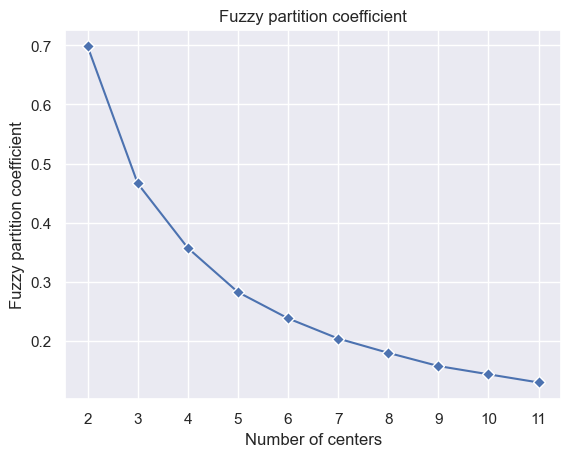

In [29]:
# Validation plot for the clustering structure - Fuzzy partition coefficient
sns.set_theme(style="darkgrid")
plt.plot(range(cmin, cmax), fpcs,  marker='D', mec='white')
plt.title("Fuzzy partition coefficient")
plt.xlabel("Number of centers")
plt.ylabel("Fuzzy partition coefficient")
plt.xticks(range(cmin, cmax))
plt.show()

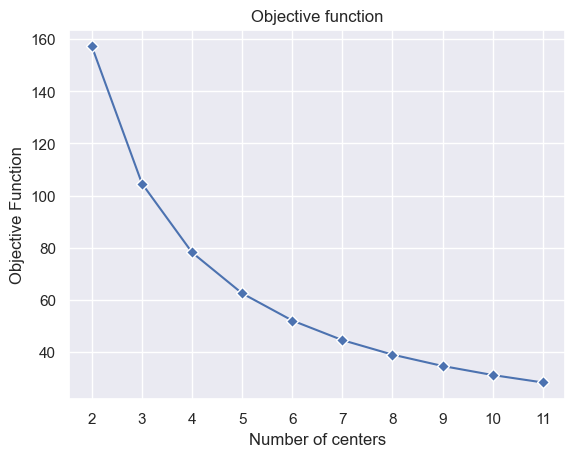

In [30]:
# Validation plot for the clustering structure - Objective function
sns.set_theme(style="darkgrid")
plt.plot(range(cmin, cmax), jms, marker='D', mec='white')
plt.title("Objective function")
plt.xlabel("Number of centers")
plt.ylabel("Objective Function")
plt.xticks(range(cmin, cmax))
plt.show()

### $10$ Different random initialization for each value of c

In [31]:
from random import randint

# Appling the fuzzy c-means with c = cmin, ..., cmax each of them with different initialization seeds
fpcs = []
jms = []  
cmin = 2
cmax = 12

for ncenters in range(cmin, cmax):
    fpc_temp = []
    jm_tamp = []
    for trial in range(10):
        cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(data=X_norm.T, 
                                                             c=ncenters, 
                                                             m=2, 
                                                             error=0.001, 
                                                             maxiter=1000, 
                                                             init=None,
                                                             seed=randint(0,1000))
        fpc_temp.append(fpc)
        jm_tamp.append(jm[-1])
    fpcs.append(fpc_temp)   # Store fpc values (Fuzzy Partition Coefficient for clustering validation)
    jms.append(jm_tamp)     # jm = (um * d ** 2).sum() value of the objective function at last iteration

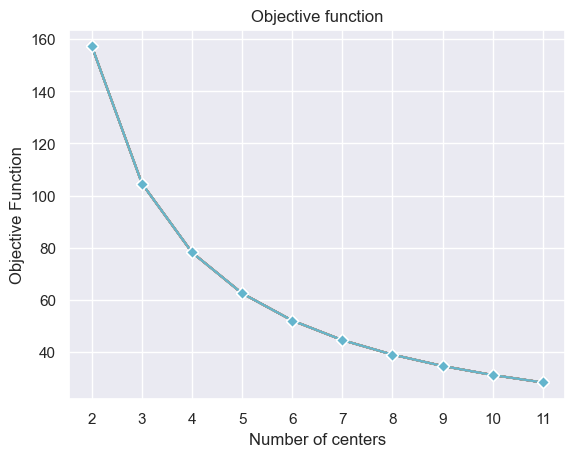

In [32]:
# Validation plot for the clustering structure - Objective function
# from the graph below we can see that the last value of the objective function is the same in each  c for all 
# the ten different random initializations

plt.plot(range(cmin, cmax), jms,marker='D', mec='white')
plt.title("Objective function")
plt.xlabel("Number of centers")
plt.ylabel("Objective Function")
plt.xticks(range(cmin, cmax))
plt.show()

----
## AP-FCM  (Anomalous Pattern - Fuzzy c-mean)

### Fuzzy c-means initialize with centroids of Iterative Anomalous Patter algorithm
- Take the Anomalous Clustering as the initialization algorithm to the fuzzy c-means and apply the Anomalous Patterns_FCM to your data set. 
- Discuss the option taken for setting its stop condition. Present and visualize the found fuzzy partitions of AP-FCM taking advantage of the PCA visualization (check PCA tutorial).

In [33]:
## Anomalous Pattern Algorithm

def center_(x, cluster):
    """ finds the centroid of a cluster
      X - the original data matrix
      cluster - the set with indices of the objects belonging to the cluster
    """
    #number of columns
    mm = x.shape[1]
    centroidC = []
    
    for j in range(mm):
        zz = x[:, j] # extract column j
        zc = []     
        for i in cluster:
            zc.append(zz[i])          # extract from column j the records that belongs to the cluster through the index
        centroidC.append(np.mean(zc)) # compute the mean of column j of the records in the cluster and append it to centroidC
    return centroidC


def distNorm(x ,remains, ranges, p):
    """ Finds the normalized distances of data points in 'remains' to reference point 'p' 
     X - the original data matrix;
     remains- the set of X-row indices under consideration
     ranges- the vector with ranges of data features 
     p - the data point the distances relate to
     distan- the output column of distances from p to remains """

    #number of columns
    mm = x.shape[1]
    rr = len(remains)
    z = x[remains, :]
    az = np.tile(np.array(p), (rr, 1))
    rz = np.tile(np.array(ranges), (rr, 1))
    dz = (z - az) / rz
    dz = np.array(dz)
    ddz = dz * dz
    if mm > 1:
        di = sum(ddz.T)
    else:
        di = ddz.T
    distan = di
    return distan


def separCluster(x0, remains, ranges, a, b):
    """  Builds a cluster by splitting the points around refernce point 'a' from those around reference point b 
    x0 - data matrix
    remains- the set of X-row indices under consideration
    ranges- the vector with ranges of data features
    a, b - the reference points
    cluster - set with row indices of the objects belonging to the cluster  
    """
    
    dista = distNorm(x0, remains, ranges, a)
    distb = distNorm(x0, remains, ranges, b)
    clus = np.where(dista < distb)[0]
    cluster = []
    for i in clus:
        cluster.append(remains[i])
    return cluster

def anomalousPattern(x, remains, ranges, centroid, me):
    """ Builds one anomalous cluster based on the algorithm 'Separate/Conquer' (Mirkin, 1999, Machine Learning Journal) 
        X - data matrix,
        remains - set of its row indices (objects) under consideration,
        ranges - normalizing values: the vector with ranges of data features  
        centroid - initial center of the anomalous cluster being build
        me - vector to shift the 0 (origin) to,
        output: cluster - set of row indices in the anomalous cluster, 
        centroid -center of the cluster    """
        
    key = 1
    while key == 1:
        cluster = separCluster(x, remains, ranges, centroid, me)
        if len(cluster) != 0:
            newcenter = center_(x, cluster)
        ## Check Stop condition of slide #56    
        if  len([i for i, j in zip(centroid, newcenter) if i == j]) != len(centroid):
            centroid = newcenter
        else:
            key = 0
    return cluster, centroid

def dist(x, remains, ranges, p):
    """ Calculates the normalized distances of data points in 'remains' to reference point 'p'   
        X - data matrix,
        remains - set of its row indices (objects) under consideration,
        ranges - normalizing values: the vector with ranges of data features  
    
       distan - the calculated normalized distances
    """

    #number of columns
    mm = x.shape[1]
    rr = len(remains)
    distan = np.zeros((rr,1))    
    for j in range(mm):
        z = x[:, j]
        z = z.reshape((-1,1))
        zz = z[remains]
        y = zz - p[j]
        y = y / ranges[j]
        y = np.array(y)
        yy = y * y
        distan = distan + yy
    return distan


def iterative_anomalous_cluster(x, threshold):
    """ 
    Main body for the Iterative Anomalous Cluster
    
    input:
    x = centered and normalized data
    threshold = minimum number of entities in a cluster
    
    return:
    cent = centroids coordinate
    cluster_contribution = cluster_contribution to total data scatter
    """
    
    # number of data points
    nn = x.shape[0]
    # number of features
    mm = x.shape[1]
    
    # store grand means
    me = []
    # store maximum value
    mmax = []
    # store minimum value
    mmin = []
    # store ranges
    ranges = []
    # data structure to keep everything together
    ancl = []
    
    
    for j in range(mm): # for each feature
        z = x[:, j]
        me.append(np.mean(z))   
        mmax.append(np.max(z))
        mmin.append(np.min(z))
        ranges.append(mmax[j] - mmin[j])
        
    sY = np.array(x)                 # from matrix to array (sequence)
    d = np.sum(sY * sY)              # compute the total data scatter of normalized data
    
    
    # x, me range, d
    remains = list(range(nn))  # current index set of residual data after some anomalous clusters are extracted
    numberC = 0;               # anomalous cluster counter
    while(len(remains) != 0):
        distance = dist(x, remains, ranges, me) # finding normalised distance vector from remains data points to reference 'me' mean
        ind = np.argmax(distance)  # find the point farthest away from the grand mean 
        index = remains[ind]       # find the index point farthest away from the grand mean
        centroid = x[index, :]     # initial anomalous center reference point
        numberC = numberC + 1
        
        cluster, centroid = anomalousPattern(x, remains, ranges, centroid, me) # finding AP cluster
        
        
        censtand = np.divide((np.asarray(centroid) - me), np.asarray(ranges))   # standardised centroid   
        dD = np.sum(np.divide(censtand * censtand.T * len(cluster) * 100, d))   # cluster contribution to data scatter (percentage)
    
        remains = np.setdiff1d(remains, cluster) # removing the data clustered from the remaining data
        # storing information in ancl
        ancl.append(cluster)   # set of data points in the cluster
        ancl.append(censtand)  # standardised centroid
        ancl.append(dD)        # proportion of the data scatter
        
    ancl = np.asarray(ancl, dtype=object)
    ancl = ancl.reshape((numberC, 3))  # reshaping ancl data structure with all information 
                                       # 3 because -> 1-cluster index 2-standardised centroid 3-proportion of data scatter
    
    ll = [] # container for list of clusters
    
    for ik in range(numberC):
        ll.append(len(ancl[ik, 0]))   # at index 0 we have the indexes of the records belonging to cluster ik
        
    rl = [i for i in ll if i >= threshold] # list of clusters with at least threshold elements (filter)
    cent = []                              # container to store the centroids
    cluster_contribution = []              # container to store cluster contribution
    n_of_points = []                       # container to store the number of points in the cluster
    
    if (len(rl) == 0):  # if rl is empty it means that the threshold is too high (there are no cluster that cointains more than threshold elements)
        print('Too great a threhsold!!!') # rising a warning message
    else:
        for ik in range(numberC):
            cluster = ancl[ik,0]
            if(len(cluster) >= threshold):
                cent.append(ancl[ik, 1])  # append the centroids to "cent" if their cluster size is above the threshold
                cluster_contribution.append(ancl[ik, 2])
                n_of_points.append(len(ancl[ik, 0]))
                
    return cent, cluster_contribution, n_of_points


In [34]:
# Iterative Anomalous Pattern on X_norm
centroids , cluster_contribution, n_of_points = iterative_anomalous_cluster(x=X_norm, threshold=25)

# centroids coordinate
for i, c in enumerate(centroids):
    print(f"centroid {i}: {c}")

# cluster contribution to the total data scatter
for i, c in enumerate(cluster_contribution):
    print(f"cluster {i} contribution: {c}")

# cluster number of points
for i, n in enumerate(n_of_points):
    print(f"cluster {i} number of points: {n}")

centroid 0: [ 0.21089841  0.08833258  0.21844158  0.19014793  0.0818653   0.19228908
  0.25349136  0.27429351  0.08746173  0.02609439  0.10819175  0.00780069
  0.10243459  0.09044085 -0.00468535  0.09492394  0.04754112  0.09351173
  0.01110357  0.03390729  0.22950486  0.1013933   0.22804744  0.18483505
  0.09749374  0.16553495  0.19717602  0.30457606  0.07351835  0.07415882]
centroid 1: [-1.11702651e-01 -4.46720050e-02 -1.15915216e-01 -9.38133471e-02
 -5.52525008e-02 -1.17615388e-01 -1.39654551e-01 -1.49251104e-01
 -4.98905960e-02 -2.49095541e-02 -4.60075445e-02  5.03513335e-03
 -4.55530260e-02 -3.76627945e-02  3.76597008e-03 -6.70643182e-02
 -3.59398135e-02 -6.97216237e-02  1.17637109e-04 -2.84398704e-02
 -1.18343445e-01 -5.54407003e-02 -1.18830934e-01 -8.79453820e-02
 -6.62621208e-02 -1.04849373e-01 -1.25760889e-01 -1.90244938e-01
 -4.79869316e-02 -5.49649426e-02]
centroid 2: [-0.10379399 -0.00929291 -0.09297337 -0.08916975  0.09054544  0.13295114
  0.08830593  0.02202356  0.11221281

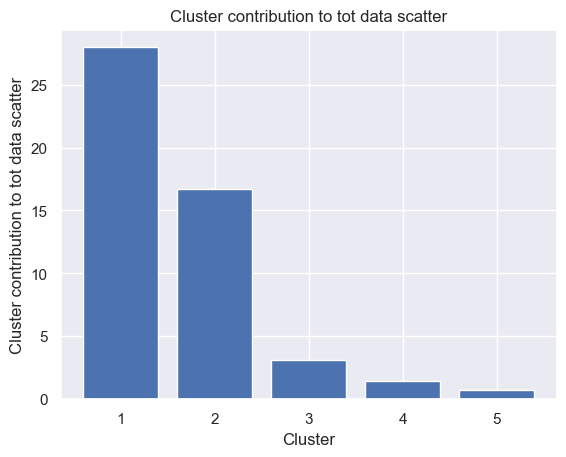

In [35]:
# Plot of the cluster contribution to total data scatter
plt.bar(range(1, len(cluster_contribution)+1), cluster_contribution)
plt.title("Cluster contribution to tot data scatter")
plt.xlabel("Cluster")
plt.ylabel("Cluster contribution to tot data scatter")
plt.show()

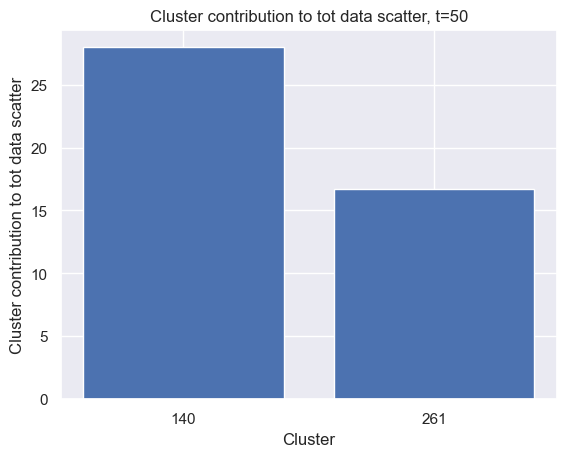

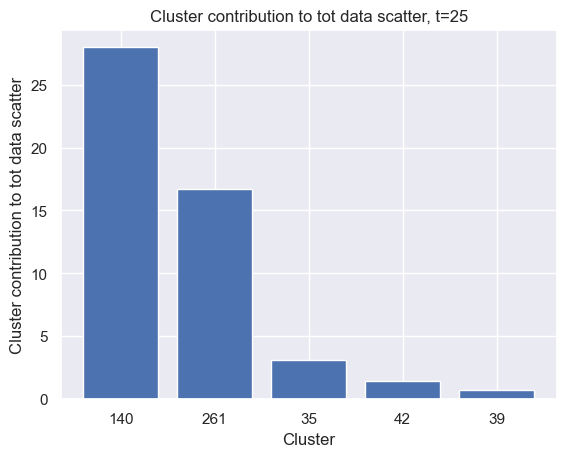

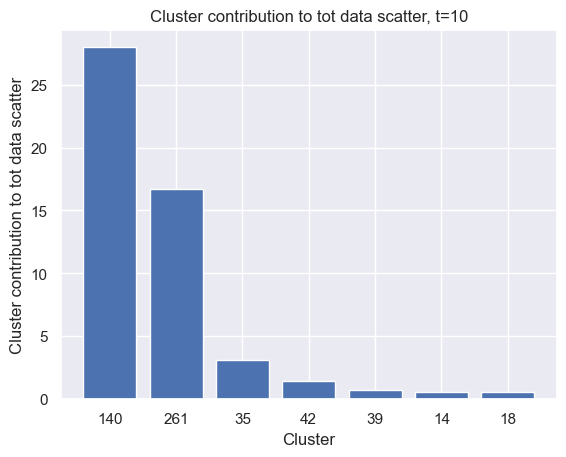

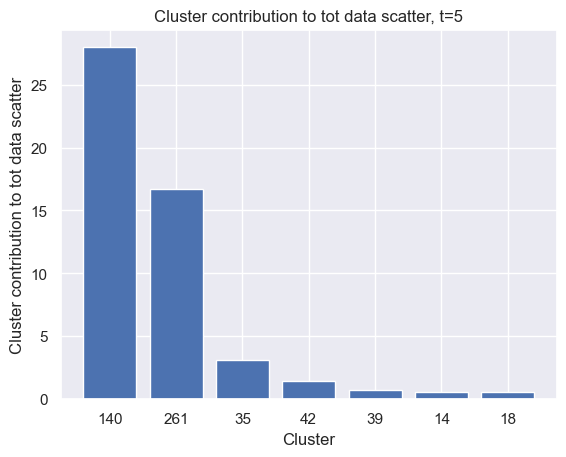

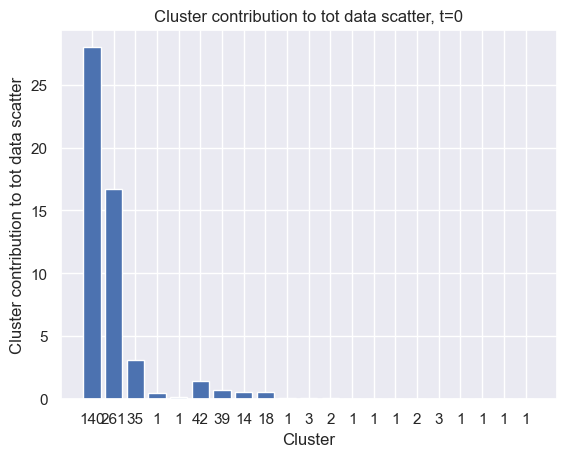

In [36]:
# Performs AP with different thresholds and evaluate the results with Cluster contribution to tot data scatter

thresholds = [50, 25, 10, 5, 0]

for t in thresholds:
    centroids , cluster_contribution, n_of_points = iterative_anomalous_cluster(x=X_norm, threshold=t)
    plt.bar(range(1, len(cluster_contribution)+1), cluster_contribution, tick_label=n_of_points)
    plt.title(f"Cluster contribution to tot data scatter, t={t}")
    plt.xlabel(f"Cluster")
    plt.ylabel(f"Cluster contribution to tot data scatter")
    plt.show()
    

In [37]:
# The function below is defined in order to compute the membership meatrix given the centroids coordinate provided 
# as parameters.

def membership_matrix(data, centroids):
    """
    Compute the membership matrix
    
    input:
    data: data matrix (normalized)
    centroids: list of centroids coordinate
    
    return:
    U: membership matrix
    """
    
    D = []
    
    # Computing the distance of the normalized data matrix from list of centroids
    for c in centroids:
        D.append(np.linalg.norm(data-c, axis=1))
    D = np.array(D)
    
    # Computing the denominator of the formula for membership
    den = np.sum((1/D)**2, axis=0)
    
    # Computing U matrix
    U = []
    for e in D:
        U.append((1/e)**2/den)
    U = np.array(U).T
    
    return U

In [38]:
U = membership_matrix(data=X_norm, centroids=[centroids[0], centroids[1]])
U.shape

(569, 2)

In [39]:
# Checking the correctness of the results with point at index 0
for i in range(U.shape[1]):
    print(f"membership of pattern at index 0 to u{i}: {U[0, i]}")

print(f"sum of membership of point at 0: {np.sum(U[0, :])}")

membership of pattern at index 0 to u0: 0.8056976553752
membership of pattern at index 0 to u1: 0.19430234462480003
sum of membership of point at 0: 1.0


## FCM without membership matrix initialization

In [40]:
# Appling the AP-FCM without matrix initialization

cntr_FCM, u_FCM, u0_FCM, d_FCM, jm_FCM, p_FCM, fpc_FCM = fuzz.cluster.cmeans(data=X_norm.T, 
                                                                              c=2, 
                                                                              m=2, 
                                                                              error=0.001, 
                                                                              maxiter=1000,
                                                                              init=None)

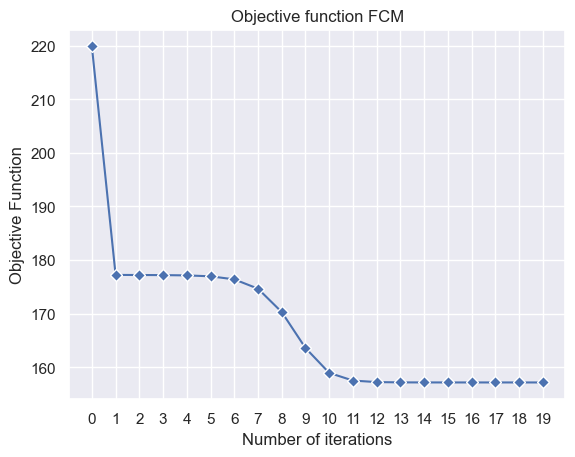

In [41]:
# Validation plot for the clustering structure - Objective function
plt.plot(range(p_FCM), jm_FCM, marker='D', mec='white')
plt.title("Objective function FCM")
plt.xlabel("Number of iterations")
plt.ylabel("Objective Function")
plt.xticks(range(p_FCM))
plt.show()

## AP-FCM with membership matrix initialization

In [42]:
# Appling the AP-FCM with membership matrix initialization

cntr_AP_FCM, u_AP_FCM, u0_AP_FCM, d_AP_FCM, jm_AP_FCM, p_AP_FCM, fpc_AP_FCM = fuzz.cluster.cmeans(data=X_norm.T, 
                                                                                                   c=2, 
                                                                                                   m=2, 
                                                                                                   error=0.001, 
                                                                                                   maxiter=1000, 
                                                                                                   init=U.T)

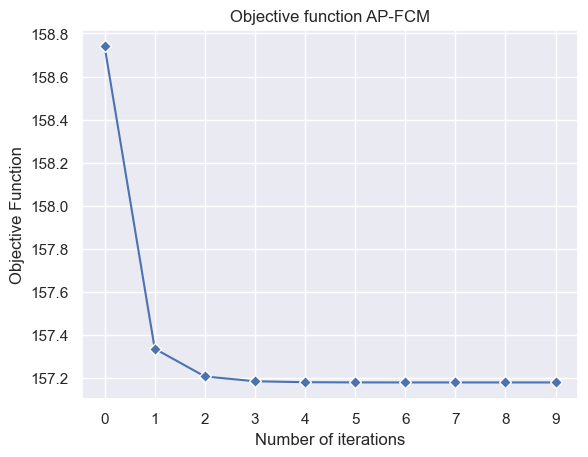

In [43]:
# Validation plot for the clustering structure - Objective function
plt.plot(range(p_AP_FCM), jm_AP_FCM, marker='D', mec='white')
plt.title("Objective function AP-FCM")
plt.xlabel("Number of iterations")
plt.ylabel("Objective Function")
plt.xticks(range(p_AP_FCM))
plt.show()

In [44]:
# defuzzification of the clustering results using highest membership value
# IMPORTANT: taken argmin and not argmax to have coherence with true_label
defuzz_AP_FCM = np.argmin(u_AP_FCM.T, axis=1)

# counting the number of elements in each cluster
np.unique(defuzz_AP_FCM, return_counts=True)

(array([0, 1]), array([372, 197]))

In [45]:
# visualization in two PCA (using sklearn)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca = pca.fit(X_norm)
pca_results = pca.transform(X_norm)

# Projection of centroids coordinate in the reduced space
centroid_1 = pca.transform(cntr_AP_FCM[0].reshape(1, -1) )
centroid_2 = pca.transform(cntr_AP_FCM[1].reshape(1, -1) )

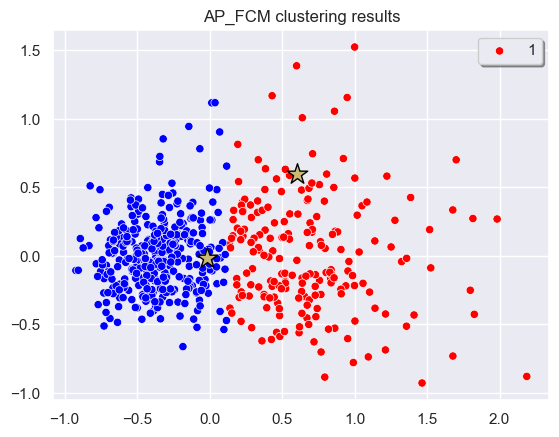

In [46]:
# Normalization by Range
sns.scatterplot(pca, 
                x=pca_results[:,0], 
                y=pca_results[:,1], 
                c=defuzz_AP_FCM,
                cmap='bwr')
plt.title('AP_FCM clustering results')
plt.legend(defuzz_AP_FCM, shadow=True)
plt.scatter( centroid_1, centroid_1, c='y', s=240, edgecolor='black', marker="*")

plt.show()

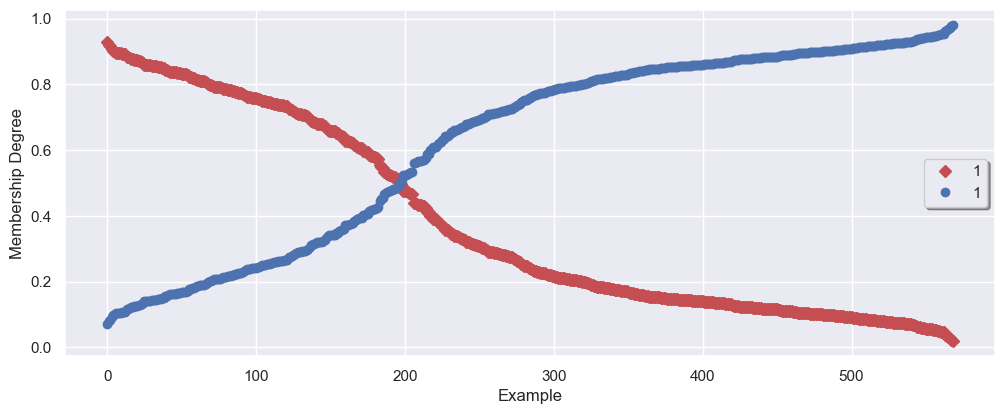

In [47]:
# Membership Degree plot

fig = plt.figure(figsize=(12, 4.5))

plt.plot(range(u_AP_FCM.shape[1]), sorted(u_AP_FCM[0], reverse=True), 'D', color='r', data=defuzz_AP_FCM)
plt.plot(range(u_AP_FCM.shape[1]), sorted(u_AP_FCM[1]), 'o', color='b', data=defuzz_AP_FCM)
plt.legend(defuzz_AP_FCM, shadow=True)

plt.xlabel("Example")
plt.ylabel("Membership Degree")
plt.show()

----
## Validation indices
Apply, at least, two validation indices:
1. **Adjust Rand Index (ARI)** 
2. **Xie-Beni**

Compare the quality of the fuzzy c-partitions obtained with FCM with and without initialization.

In [48]:
from sklearn.metrics.cluster import adjusted_rand_score, contingency_matrix

#### Results FCM

In [49]:
# defuzzification of the clustering results using highest membership value
# IMPORTANT: taken argmin and not argmax to have coherence with true_label
defuzz_FCM = np.argmin(u_FCM.T, axis=1)

# counting the number of elements in each cluster
np.unique(defuzz_FCM, return_counts=True)

(array([0, 1]), array([372, 197]))

In [50]:
# ARI The Rand Index computes a similarity measure between two clusterings by considering all pairs of samples 
# and counting pairs that are assigned in the same or different clusters in the predicted and true clusterings.
# Similarity score between -0.5 and 1.0. Random labelings have an ARI close to 0.0. 1.0 stands for perfect match.

print(f'ARI: {adjusted_rand_score(data["diagnosis_M"],defuzz_FCM)}')

ARI: 0.7304861795899276


In [51]:
# Fuzzy partition coefficient FCM
print(f'Fuzzy Partition Coefficient: {fpc_FCM}')

Fuzzy Partition Coefficient: 0.6980628860277118


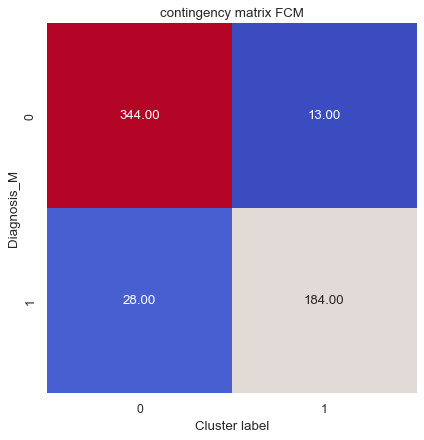

In [52]:
contingency_matrix = pd.crosstab(defuzz_FCM, data["diagnosis_M"])

fig = plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

plt.clf()

ax = fig.add_subplot(111)

ax.set_aspect(1)

res = sns.heatmap(contingency_matrix.T, annot=True, fmt='.2f', cmap="coolwarm", cbar=False)

plt.title("contingency matrix FCM")
plt.xlabel("Cluster label")
plt.ylabel("Diagnosis_M")
plt.show()

#### Results AP-FCM

In [53]:
# defuzzification of the clustering results using highest membership value
defuzz_AP_FCM = np.argmin(u_AP_FCM.T, axis=1)

# counting the number of elements in each cluster
np.unique(defuzz_AP_FCM, return_counts=True)

(array([0, 1]), array([372, 197]))

In [54]:
# ARI The Rand Index computes a similarity measure between two clusterings by considering all pairs of samples 
## and counting pairs that are assigned in the same or different clusters in the predicted and true clusterings.
# Similarity score between -0.5 and 1.0. Random labelings have an ARI close to 0.0. 1.0 stands for perfect match.

print(f'ARI: {adjusted_rand_score(data["diagnosis_M"],defuzz_AP_FCM)}')

ARI: 0.7304861795899276


In [55]:
# Fuzzy partition coefficient FCM
print(f'Fuzzy Partition Coefficient: {fpc_AP_FCM}')

Fuzzy Partition Coefficient: 0.6980826929474607


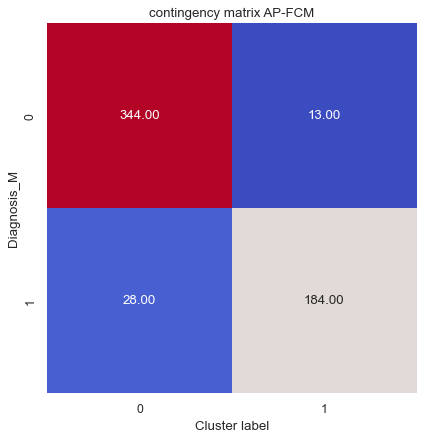

In [56]:
contingency_matrix = pd.crosstab(defuzz_AP_FCM, data["diagnosis_M"])

fig = plt.figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

plt.clf()

ax = fig.add_subplot(111)

ax.set_aspect(1)

res = sns.heatmap(contingency_matrix.T, annot=True, fmt='.2f', cmap="coolwarm", cbar=False)

plt.title("contingency matrix AP-FCM")
plt.xlabel("Cluster label")
plt.ylabel("Diagnosis_M")
plt.show()